# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

i = 0
set = 1

## Generate Cities List

In [14]:
# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# initial conditions

city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

i = 0
set = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        if i > 48:
            i=1
            set+=1
            city_list.append(city)
      
        else:
            i+=1
            city_list.append(city)
        print(f"Processing Record {i} of Set {set}| {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1| hilo
Processing Record 2 of Set 1| hobart
Processing Record 3 of Set 1| punta arenas
City not found. Skipping...
Processing Record 4 of Set 1| tuktoyaktuk
Processing Record 5 of Set 1| yerbogachen
Processing Record 6 of Set 1| ileza
Processing Record 7 of Set 1| sindor
Processing Record 8 of Set 1| barrow
Processing Record 9 of Set 1| puerto leguizamo
City not found. Skipping...
Processing Record 10 of Set 1| kristinehamn
Processing Record 11 of Set 1| charters towers
Processing Record 12 of Set 1| vaini
Processing Record 13 of Set 1| fortuna
Processing Record 14 of Set 1| mataura
Processing Record 15 of Set 1| iracoubo
Processing Record 16 of Set 1| ushuaia
Processing Record 17 of Set 1| hasaki
Processing Record 18 of Set 1| mahebourg
Processing Record 19 of Set 1| albany
Processing Record 20 of Set 1| mitu
Processing Record 21 of Set 1| tual
Processing Record 22 of Set 1| rikitea
Processing Record 2

Processing Record 41 of Set 4| ikongo
Processing Record 42 of Set 4| williston
Processing Record 43 of Set 4| samarai
Processing Record 44 of Set 4| diffa
Processing Record 45 of Set 4| almeria
Processing Record 46 of Set 4| nishihara
Processing Record 47 of Set 4| cao bang
Processing Record 48 of Set 4| sabha
Processing Record 49 of Set 4| port hardy
Processing Record 1 of Set 5| camacari
Processing Record 2 of Set 5| teguise
Processing Record 3 of Set 5| praia da vitoria
Processing Record 4 of Set 5| ouahigouya
Processing Record 5 of Set 5| berlevag
Processing Record 6 of Set 5| seoul
Processing Record 7 of Set 5| mosquera
Processing Record 8 of Set 5| qingdao
City not found. Skipping...
Processing Record 9 of Set 5| atambua
Processing Record 10 of Set 5| bengkulu
Processing Record 11 of Set 5| heihe
Processing Record 12 of Set 5| vysokogornyy
Processing Record 13 of Set 5| vilcun
Processing Record 14 of Set 5| chibuto
Processing Record 15 of Set 5| chicama
Processing Record 16 of Se

Processing Record 40 of Set 8| abha
Processing Record 41 of Set 8| puerto escondido
Processing Record 42 of Set 8| treinta y tres
Processing Record 43 of Set 8| micheweni
Processing Record 44 of Set 8| cabo san lucas
Processing Record 45 of Set 8| mikkeli
Processing Record 46 of Set 8| radaur
Processing Record 47 of Set 8| padang
Processing Record 48 of Set 8| gorom-gorom
Processing Record 49 of Set 8| kuopio
Processing Record 1 of Set 9| cidreira
Processing Record 2 of Set 9| acarau
Processing Record 3 of Set 9| yermakovskoye
Processing Record 4 of Set 9| minab
Processing Record 5 of Set 9| port lincoln
City not found. Skipping...
Processing Record 6 of Set 9| ajdabiya
Processing Record 7 of Set 9| provideniya
Processing Record 8 of Set 9| fairbanks
Processing Record 9 of Set 9| allapalli
Processing Record 10 of Set 9| lapua
Processing Record 11 of Set 9| kristianstad
City not found. Skipping...
Processing Record 12 of Set 9| hambantota
Processing Record 13 of Set 9| kamenka
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
# city_list = []
# cloudiness_list = []
# country_list = []
# date_list = []
# humidity_list = []
# lat_list = []
# lng_list = []
# max_temp_list = []
# wind_speed_list = []

# for resp in responses:
   
city_data_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Wind Speed': wind_speed_list}

city_data_df = pd.DataFrame(city_data_dict)

# city_data_df.to_csv(output_data_file, index=False)

city_data_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [26]:
# city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,90,US,1595921474,61,19.73,-155.09,80.60,4.70
1,hobart,75,AU,1595921353,81,-42.88,147.33,51.01,3.36
2,punta arenas,71,CL,1595921340,80,-53.15,-70.92,37.40,14.99
3,tuktoyaktuk,100,CA,1595921474,95,69.45,-133.04,45.68,13.38
4,yerbogachen,100,RU,1595921475,91,61.28,108.01,55.09,6.29
...,...,...,...,...,...,...,...,...,...
557,cacapava do sul,99,BR,1595921602,100,-30.51,-53.49,46.78,7.81
558,basco,100,PH,1595921603,69,20.45,121.97,86.14,6.64
559,batagay-alyta,99,RU,1595921603,57,67.80,130.41,56.21,10.69
560,jacqueville,75,CI,1595921603,94,5.21,-4.41,75.20,2.24


In [53]:
city_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,562.000000,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000
mean,52.172598,1.595922e+09,69.494662,19.007509,20.063381,70.456762,8.062918
std,39.873916,6.020889e+01,20.881061,33.591396,88.711630,14.288607,5.318874
min,0.000000,1.595921e+09,3.000000,-54.800000,-179.170000,30.200000,0.400000
25%,6.000000,1.595922e+09,56.000000,-8.717500,-55.892500,61.412500,4.430000
50%,61.500000,1.595922e+09,74.000000,20.250000,25.965000,71.895000,7.090000
75%,91.000000,1.595922e+09,85.000000,48.112500,97.777500,79.955000,11.180000
max,100.000000,1.595922e+09,100.000000,78.220000,179.320000,107.010000,35.570000


In [54]:
hi_humidity = city_data_df[city_data_df['Humidity'] > 100 ].index
cleaned_city_data = city_data_df.drop(hi_humidity, inplace=False)
# cleaned_city_data = city_data_df.drop(city_dat'H, inplace=False)
cleaned_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hilo,90,US,1595921474,61,19.73,-155.09,80.60,4.70
1,hobart,75,AU,1595921353,81,-42.88,147.33,51.01,3.36
2,punta arenas,71,CL,1595921340,80,-53.15,-70.92,37.40,14.99
3,tuktoyaktuk,100,CA,1595921474,95,69.45,-133.04,45.68,13.38
4,yerbogachen,100,RU,1595921475,91,61.28,108.01,55.09,6.29
...,...,...,...,...,...,...,...,...,...
557,cacapava do sul,99,BR,1595921602,100,-30.51,-53.49,46.78,7.81
558,basco,100,PH,1595921603,69,20.45,121.97,86.14,6.64
559,batagay-alyta,99,RU,1595921603,57,67.80,130.41,56.21,10.69
560,jacqueville,75,CI,1595921603,94,5.21,-4.41,75.20,2.24


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# hi_humidity=city_data_df.loc[city_data_df["Humidity"] > 100, inplace = True]
# # cleaned_me = city_data_df.drop(hi_humidity, inplace=False)
# hi_humidity

In [56]:
# hi_humidity=city_data_df.loc[city_data_df["Humidity"] > 100]
# # mmm = city_data_df.drop(hi_humidity, inplace=False)
# hi_humidity

In [57]:
hi_humidity = city_data_df[city_data_df['Humidity'] > 100 ].index
cleaned_city_data = city_data_df.drop(hi_humidity, inplace=False)


# indexNames = dfObj[ dfObj['Age'] == 30 ].index
# # Delete these row indexes from dataFrame
# dfObj.drop(indexNames , inplace=True

# # Get names of indexes for which column Age has value 30
# Hum_index = dfObj[ dfObj['Age'] == 30 ].index
# # Delete these row indexes from dataFrame
# dfObj.drop(indexNames , inplace=True)

In [58]:
#  Get the indices of cities that have humidity over 100%.


In [59]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [60]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

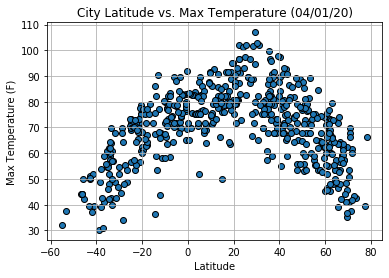

In [64]:
x_values = cleaned_city_data['Lat']
y_values = cleaned_city_data['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (04/01/20)')
# plt.savefig('Figures/fig1.png')
plt.show()

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

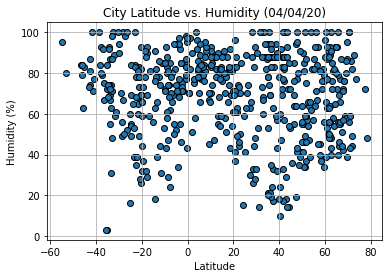

In [65]:
x_values = cleaned_city_data['Lat']
y_values = cleaned_city_data['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (04/04/20)')
# plt.savefig('output_data/CityLatitudeVsHumidity.png')
plt.show

## Latitude vs. Cloudiness Plot

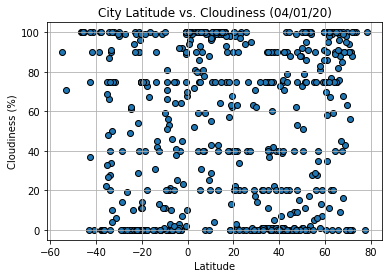

In [66]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (04/01/20)')
# plt.savefig('output_data/CityLatitudeVsCloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

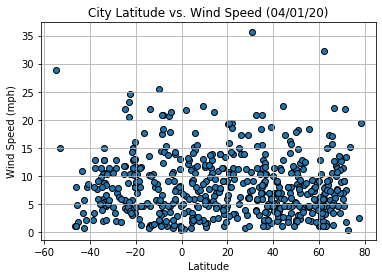

In [67]:
x_values = cleaned_city_data['Lat']
y_values = cleaned_city_data['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (04/01/20)')
# plt.savefig('output_data/CityLatitudeVsWindSpeed.png')
plt.show()

## Linear Regression

In [68]:
# OPTIONAL: Create a function to create Linear Regression plots

In [69]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [70]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    print(f"The r-squared is: {rvalue}")
    plt.show()
#     plt.savefig(file_name)

In [71]:
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] > 0, :]
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

The r-squared is: -0.5935642332764351


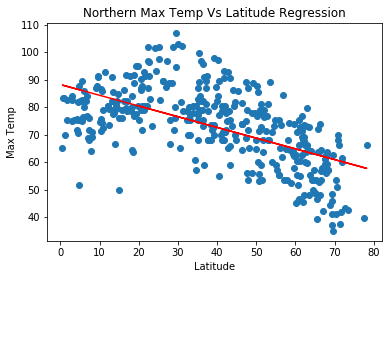

In [72]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'output_data/NorthernMaxTempVsLatitudeReg.png', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression